### Sentiment analysis using VADER package
### Topic Modelling(clustering)
### Word2vec(Classification,word Embedding)

# For Sentiment analysis using Vader we shud not do text cleaning processes

In [1]:
# importing the basic libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

## VADER package
Varience Aware Dictionary & sEntiment Reasoner

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()
sentiment.polarity_scores('i love INDIA')

C:\Users\HII\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

presence positive/negative words, emotion words,puncutation,Capital letters,Boosting words like(very, much,not)


neg- Negative intensity  
neu- Neutral word intensity  -( for all neutral words the score by default will be 1)
pos-positive word intendity   
compound - overall score of the sentence (-1 to 1) around 1 positive  around -1 very negative


In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()
sentiment.polarity_scores('i love India !!')

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.6988}

In [4]:
import math
score=0.5
alpha=15
score/np.sqrt((score**2)+alpha)

0.12803687993289598

In [5]:
# reading the imdb reviews csv
imdb=pd.read_csv('C:\\Users\\HII\\Desktop\\Text Mining\\10 Text Mining\\imdb_sentiment.csv')
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


## Sentiment Analysis and polarity score for each words

In [6]:
sentiment=SentimentIntensityAnalyzer()
def get_sentiment(review):
    compound=sentiment.polarity_scores(review)['compound']
    return 0 if compound<0 else 1 # we converted the polarity into 0 and 1 to do comparision


imdb['vader']=imdb['review'].apply(get_sentiment)


In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(imdb['sentiment'],imdb['vader'])*100

77.67379679144385

# Prediction of sentiment for Hotstar reviews

In [8]:
data=pd.read_csv('C:\\Users\\HII\\Desktop\\Text Mining\\10 Text Mining\\hotstar.allreviews_Sentiments.csv')
data.head(10)

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral
5,6,BeingUsual,8/7/2017,@hotstartweets Not able 2 watch the latest epi...,@hotstartweets not able 2 watch the latest epi...,Help,Negative,139,Twitter,2017,8,7,Neutral
6,7,yashvi_singh,8/5/2017,Please allow RuPay or Maestro payment gateways...,please allow rupay or maestro payment gateways...,Help,Negative,139,Twitter,2017,8,5,Positive
7,8,bushrareal202,8/7/2017,@hotstar_helps why today s epi of #LoveKaHaiIn...,@hotstar_helps why today s epi of #lovekahaiin...,Help,Negative,138,Twitter,2017,8,7,Positive
8,9,sachinmittal331,8/8/2017,@hotstartweets #HotStarFraud I paid for the su...,@hotstartweets #hotstarfraud i paid for the su...,Help,Negative,138,Twitter,2017,8,8,Positive
9,10,ankush2887,8/5/2017,@hotstartweets i have a premium accnt at hotst...,@hotstartweets i have a premium accnt at hotst...,Help,Negative,138,Twitter,2017,8,5,Neutral


In [9]:
data.shape

(5053, 13)

In [10]:
# Sentiment distribution 
data.Sentiment_Manual.value_counts()/data.shape[0]*100

Neutral     34.395409
Positive    34.296458
Negative    31.308134
Name: Sentiment_Manual, dtype: float64

- Apply vader package sentiment analyzer to predict for each review
- from compound score return the following
        - if coumpound score>0.05 return 'Positive'
        - if coumpound score<0-.05 return 'Negative'
        - else  return 'Neutral'

In [18]:
# Sentiment Prediction 

def get_sentiment(review):
    compound=sentiment.polarity_scores(review)['compound']
    if compound>0.05:
        return 'Positive'
    elif compound<-0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['vader']=data['Reviews'].apply(get_sentiment)
print("The accuracy score for Hotstar review sentiment prediction is :",accuracy_score(data['Sentiment_Manual'],data['vader'])*100)

The accuracy score for Hotstar review sentiment prediction is : 55.03661191371463


In [19]:
# predicted sentiment distribution
data.vader.value_counts()/data.shape[0]*100

Positive    47.635068
Neutral     33.643380
Negative    18.721552
Name: vader, dtype: float64

In [ ]:
from sklearn.model_selection import  train_test_split
train,test=train_test_split(,test_size=0.2,random_state=100)

In [ ]:
# Model Comparison's for 4 models
DT_model=DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0)
DT_model.fit(x_train,y_train)
pred1=DT_model.predict(x_test)
Rf_model=RandomForestClassifier(n_estimators=24,max_depth=9,criterion='entropy',random_state=0)
Rf_model.fit(x_train,y_train)
pred2=Rf_model.predict(x_test)
Nb_model=GaussianNB()
Nb_model.fit(x_train,y_train)
pred3=Nb_model.predict(x_test)
LOr_model=LogisticRegression()
LOr_model.fit(x_train,y_train)
pred4=LOr_model.predict(x_test)
Kn_model=KNeighborsClassifier(n_neighbors=13,weights='uniform',metric='euclidean')
Kn_model.fit(x_train,y_train)
pred5=Kn_model.predict(x_test)

In [ ]:
# kfold cross validation
mod=[]
mod.append(('Decision Tree',DT_model))
mod.append(('Random Forest',Rf_model))
mod.append(('Naive Bayes',Nb_model))
mod.append(('Logistic Regression',LOr_model))
mod.append(('KNN',Kn_model))
result=[]
names=[]
scoring='accuracy'
for name,model in mod:
    kfold=model_selection.KFold(n_splits=7,random_state=2)# 5 fold cross validation function
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring='accuracy')
    result.append(cv_results)
    names.append(name)
    msg="%s:  Performance Range is  (%1.3f %s %1.3f) with a Varience error of (%f) and mean of %1.3f"%(name,cv_results.min()*100,'-',cv_results.max()*100,cv_results.std(),cv_results.mean()*100)
    print(msg)
# boxplot for the models

fig=plt.figure(figsize=[10,8])
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()


# Trending of Customers Sentiment

In [20]:
data.Created_Date.unique()

array(['8/10/2017', '8/11/2017', '8/12/2017', '8/5/2017', '8/7/2017',
       '8/8/2017', '8/6/2017', '8/13/2017', '8/9/2017', '8/4/2017'],
      dtype=object)

In [21]:
data['Date']=pd.to_datetime(data.Created_Date)
data.Date.unique()

array(['2017-08-10T00:00:00.000000000', '2017-08-11T00:00:00.000000000',
       '2017-08-12T00:00:00.000000000', '2017-08-05T00:00:00.000000000',
       '2017-08-07T00:00:00.000000000', '2017-08-08T00:00:00.000000000',
       '2017-08-06T00:00:00.000000000', '2017-08-13T00:00:00.000000000',
       '2017-08-09T00:00:00.000000000', '2017-08-04T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [23]:
positive_rows=data[data.vader=='Positive']
Negative_rows=data[data.vader=='Negative']
neutral_rows=data[data.vader=='Neutral']

positive_counts=positive_rows.groupby('Date')['vader'].count()
negative_counts=Negative_rows.groupby('Date')['vader'].count()
neutral_counts=neutral_rows.groupby('Date')['vader'].count()

print(positive_counts)


Date
2017-08-04    136
2017-08-05    140
2017-08-06    120
2017-08-07    142
2017-08-08     96
2017-08-09    335
2017-08-10    526
2017-08-11    578
2017-08-12    272
2017-08-13     62
Name: vader, dtype: int64


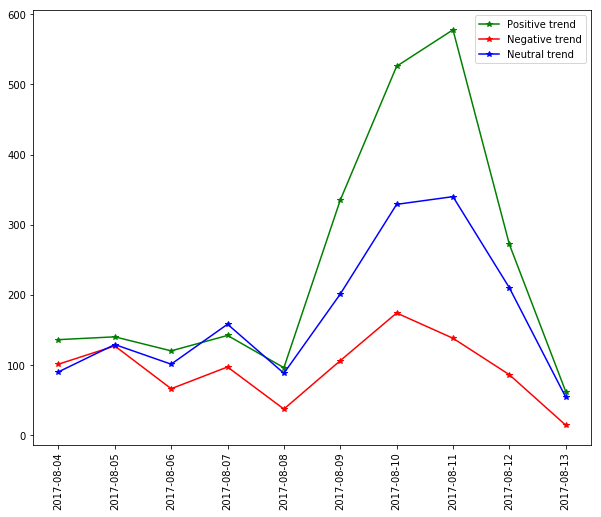

In [32]:
# trend plot between 2017-08-04  and 2017-08-13  
plt.figure(figsize=[10,8])
plt.plot(positive_counts,color='green',marker='*',label='Positive trend')
plt.plot(negative_counts,color='red',marker='*',label='Negative trend')
plt.plot(neutral_counts,color='blue',marker='*',label='Neutral trend')
plt.xticks(rotation=90)
plt.legend()
plt.show()